<a href="https://colab.research.google.com/github/saransh-03-Ag/Internship_Project/blob/main/Project_Big_Sales_Prediction_using_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of the Project:** Big Sales Prediction using Random Forest Regressor

# **Objective** : The goal is to predict the sales (Item_Outlet_Sales) of various items sold across different outlets using various features like item weight, visibility, and outlet type.


# **Data Source**: The data source for the project is a CSV file hosted on GitHub named as BIG SALES DATA

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

# **Import Data**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Big%20Sales%20Data.csv")

# **Describe Data:**

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [ ]:
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


## **Data Visualization** :
# Pairplot (using Seaborn)
# Scatter plot (Actual sales vs. Predicted sales)

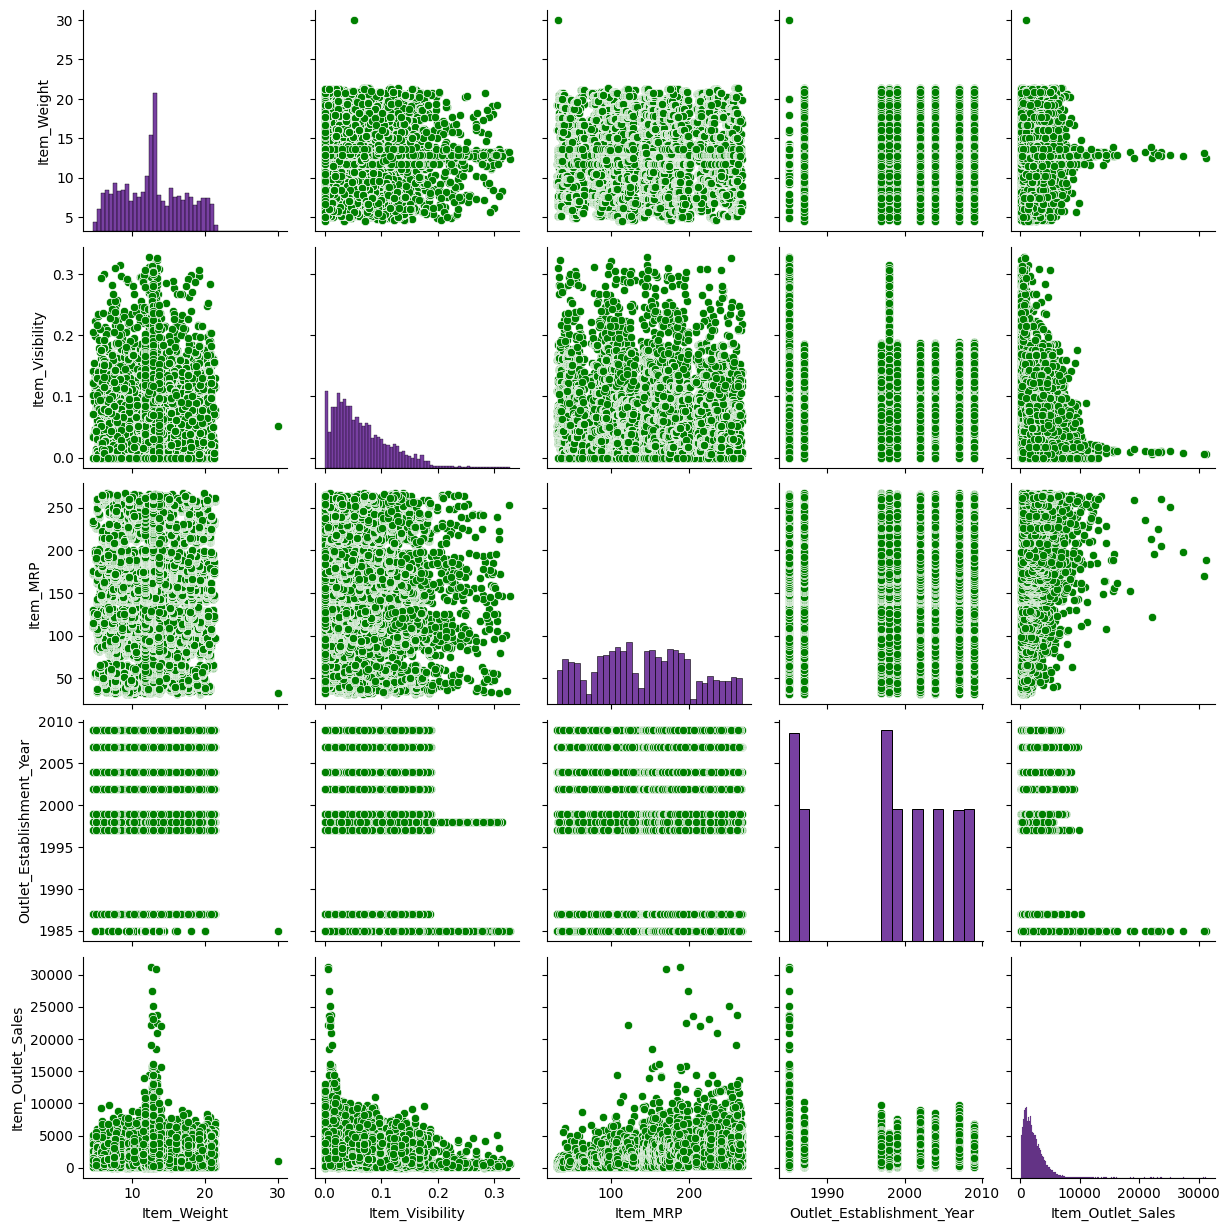

In [ ]:
sns.pairplot(df,plot_kws={'color': 'Green'},
             diag_kind='hist',
             diag_kws={'color': 'Indigo'})


# **Data Preprocessing**: To use the following columns in a machine learning model, we need to convert them into numerical values.

In [ ]:
df[['Item_Identifier']].value_counts()

,count
Item_Identifier,
FDQ08,10
FDO24,10
FDQ19,10
FDQ28,10
FDQ31,10
...,...
FDM52,7
FDM50,7
FDL50,7


In [ ]:
df[['Item_Fat_Content']].value_counts()

,count
Item_Fat_Content,
Low Fat,8485
Regular,4824
LF,522
reg,195
low fat,178


In [ ]:
df.replace({'Item_Fat_Content': {'LOW Fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
df.replace({'low fat': 0, 'Low Fat': 0, 'Regular': 1})


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3
0,FDT36,12.300000,0,0.111448,33.4874,2,1999,1,0,1,436.608721,True,False,False,False
1,FDT36,12.300000,0,0.111904,33.9874,7,2007,1,1,1,443.127721,True,False,False,False
2,FDT36,12.300000,LF,0.111728,33.9874,6,2009,1,2,2,564.598400,True,False,False,False
3,FDT36,12.300000,0,0.000000,34.3874,9,1985,0,0,0,1719.370000,True,False,False,False
4,FDP12,9.800000,1,0.045523,35.0874,7,2007,1,1,1,352.874000,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDG47,12.800000,0,0.069606,261.9252,4,2004,0,1,1,4984.178800,True,False,False,False
14200,FDG47,12.800000,0,0.070013,262.8252,7,2007,1,1,1,2885.577200,True,False,False,False
14201,FDG47,12.800000,0,0.069561,263.0252,1,1987,2,2,1,2885.577200,True,False,False,False
14202,FDG47,13.659758,0,0.069282,263.5252,5,1985,1,2,3,3803.676434,True,False,False,False


In [ ]:
df[['Item_Fat_Content']].value_counts()

,count
Item_Fat_Content,
0,9185
1,5019


In [ ]:
df[['Item_Type']].value_counts()

,count
Item_Type,
Fruits and Vegetables,2013
Snack Foods,1989
Household,1548
Frozen Foods,1426
Dairy,1136
Baking Goods,1086
Canned,1084
Health and Hygiene,858
Meat,736


In [ ]:
df.replace({'Item_Type': {'Fruits and Vegetables': 0,
                          'Snack Foods': 1,
                          'Household': 1,
                          'Frozen Foods':2,'Meat': 2,
                          'Dairy': 0,
                          'Soft Drinks':1,
                          'Hard Drinks':1,
                          'Breads': 0,
                          'Others':3,
                          'Baking Goods': 0,
                          'Canned': 0,
                          'Health and Hygiene': 3,  # Changed from 2 to 3
                          'Breakfast': 0,
                          'Seafood': 2,
                          'Starchy Foods': 0}}, inplace=True)


In [ ]:
df[['Item_Type']].value_counts()

,count
Item_Type,
0,6190
1,4625
2,2251
3,1138


In [ ]:
df[['Outlet_Identifier']].value_counts()

,count
Outlet_Identifier,
OUT027,1559
OUT013,1553
OUT035,1550
OUT046,1550
OUT049,1550
OUT045,1548
OUT018,1546
OUT017,1543
OUT010,925


In [ ]:
df.replace({'Outlet_Identifier': {'OUT045':0, 'OUT013':1, 'OUT049':2, 'OUT046':3, 'OUT035':4, 'OUT027':5, 'OUT018':6, 'OUT017':7, 'OUT010':8, 'OUT019':9}}, inplace=True)


In [ ]:
df[['Outlet_Identifier']].value_counts()

,count
Outlet_Identifier,
5,1559
1,1553
2,1550
3,1550
4,1550
0,1548
6,1546
7,1543
8,925


In [ ]:
df[['Outlet_Size']].value_counts()

,count
Outlet_Size,
Medium,7122
Small,5529
High,1553


In [ ]:
df.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':2}},inplace=True)

In [ ]:
df[['Outlet_Size']].value_counts()

,count
Outlet_Size,
1,7122
0,5529
2,1553


In [ ]:
df[['Outlet_Location_Type']].value_counts()

,count
Outlet_Location_Type,
Tier 3,5583
Tier 2,4641
Tier 1,3980


In [ ]:
df.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2}},inplace=True)


In [ ]:
df[['Outlet_Location_Type']].value_counts()

,count
Outlet_Location_Type,
2,5583
1,4641
0,3980


In [ ]:
df[['Outlet_Type']].value_counts()

,count
Outlet_Type,
Supermarket Type1,9294
Grocery Store,1805
Supermarket Type3,1559
Supermarket Type2,1546


In [ ]:
df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}},inplace=True)

In [ ]:
df[['Outlet_Type']].value_counts()

,count
Outlet_Type,
1,9294
0,1805
3,1559
2,1546


In [ ]:
item_type_dummies = pd.get_dummies(df['Item_Type'], prefix='Item_Type')
df = pd.concat([df, item_type_dummies], axis=1)
df.drop('Item_Type', axis=1, inplace=True)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3
0,FDT36,12.3,Low Fat,0.111448,33.4874,2,1999,1,0,1,436.608721,True,False,False,False
1,FDT36,12.3,Low Fat,0.111904,33.9874,7,2007,1,1,1,443.127721,True,False,False,False
2,FDT36,12.3,LF,0.111728,33.9874,6,2009,1,2,2,564.598400,True,False,False,False
3,FDT36,12.3,Low Fat,0.000000,34.3874,9,1985,0,0,0,1719.370000,True,False,False,False
4,FDP12,9.8,Regular,0.045523,35.0874,7,2007,1,1,1,352.874000,True,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  int64  
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Size                14204 non-null  int64  
 8   Outlet_Location_Type       14204 non-null  int64  
 9   Outlet_Type                14204 non-null  int64  
 10  Item_Outlet_Sales          14204 non-null  float64
 11  Item_Type_0                14204 non-null  bool   
 12  Item_Type_1                14204 non-null  bool   
 13  Item_Type_2                14204 non-null  boo

In [ ]:
df.shape

(14204, 15)

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y = df['Item_Outlet_Sales']

In [ ]:
y.shape

(14204,)

In [ ]:
y

,Item_Outlet_Sales
0,436.608721
1,443.127721
2,564.598400
3,1719.370000
4,352.874000
...,...
14199,4984.178800
14200,2885.577200
14201,2885.577200
14202,3803.676434


In [ ]:
X = df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Identifier',
        'Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'] + list(item_type_dummies.columns)]

In [ ]:
X.shape

(14204, 13)

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3
0,12.300000,Low Fat,0.111448,33.4874,2,1999,1,0,1,True,False,False,False
1,12.300000,Low Fat,0.111904,33.9874,7,2007,1,1,1,True,False,False,False
2,12.300000,LF,0.111728,33.9874,6,2009,1,2,2,True,False,False,False
3,12.300000,Low Fat,0.000000,34.3874,9,1985,0,0,0,True,False,False,False
4,9.800000,Regular,0.045523,35.0874,7,2007,1,1,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,Low Fat,0.069606,261.9252,4,2004,0,1,1,True,False,False,False
14200,12.800000,Low Fat,0.070013,262.8252,7,2007,1,1,1,True,False,False,False
14201,12.800000,Low Fat,0.069561,263.0252,1,1987,2,2,1,True,False,False,False
14202,13.659758,Low Fat,0.069282,263.5252,5,1985,1,2,3,True,False,False,False


# **Train Test Split**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_std = df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]

In [ ]:
X_std

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,12.300000,0.111448,33.4874,1999
1,12.300000,0.111904,33.9874,2007
2,12.300000,0.111728,33.9874,2009
3,12.300000,0.000000,34.3874,1985
4,9.800000,0.045523,35.0874,2007
...,...,...,...,...
14199,12.800000,0.069606,261.9252,2004
14200,12.800000,0.070013,262.8252,2007
14201,12.800000,0.069561,263.0252,1987
14202,13.659758,0.069282,263.5252,1985


In [ ]:
X.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']] = sc.fit_transform(X[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']])

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3
0,-0.115417,Low Fat,0.884136,-1.731787,2,0.139681,1,0,1,True,False,False,False
1,-0.115417,Low Fat,0.893006,-1.723734,7,1.095319,1,1,1,True,False,False,False
2,-0.115417,LF,0.889583,-1.723734,6,1.334228,1,2,2,True,False,False,False
3,-0.115417,Low Fat,-1.281712,-1.717291,9,-1.532686,0,0,0,True,False,False,False
4,-0.703509,Regular,-0.397031,-1.706016,7,1.095319,1,1,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.002201,Low Fat,0.070990,1.947664,4,0.736955,0,1,1,True,False,False,False
14200,0.002201,Low Fat,0.078898,1.962160,7,1.095319,1,1,1,True,False,False,False
14201,0.002201,Low Fat,0.070120,1.965381,1,-1.293777,2,2,1,True,False,False,False
14202,0.204448,Low Fat,0.064694,1.973435,5,-1.532686,1,2,3,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Item_Outlet_Sales']
X = df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Identifier',
        'Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'] + list(item_type_dummies.columns)]


In [ ]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((9942, 13), (4262, 13), (9942,), (4262,))

# **Modelling**: Training the Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=2529)


In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=2529)

# **Prediction:** After training the model based on data.

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
y_pred.shape

(4262,)

In [ ]:
y_pred

array([1335.87401447,  711.80402329, 2060.20338033, ..., 3527.7895919 ,
       1515.7514091 , 2814.17813407])

# **Model Evaluation:** Using various Methods for calculating the Sales

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

1673185.4930612692

In [ ]:
r2_score(y_test, y_pred)

0.5133808429237392

# **Visualization of Evaluated Model**

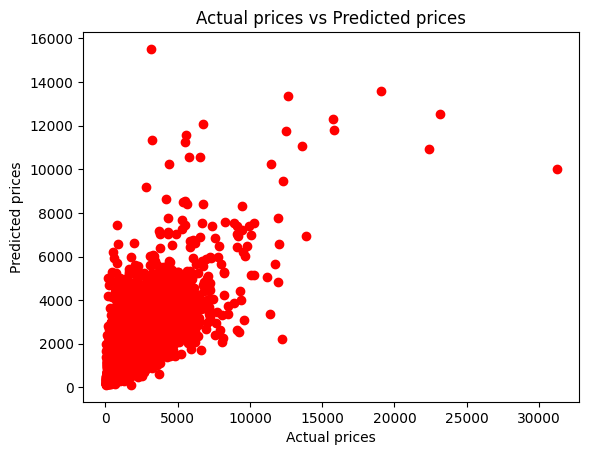

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot with red color
plt.scatter(y_test, y_pred, color='red')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()


# **Explanation for the following project**
Random Forest method predicts sales with evaluated performance.

# **Data Preprocessing:**
Load Data:- Sales data is loaded.

Handle Missing Values:- Missing Item_Weight is filled with the mean.

Encode Categorical Data:- Convert categorical columns to numerical.

Feature Engineering:- Apply one-hot encoding to Item_Type.

# **Modeling:**
Target & Features:- Predict Item_Outlet_Sales using other columns.

Standardization:- Scale numerical features.

Train/Test Split:- 70% training, 30% testing.

Random Forest:- Train the model.

# **Evaluation:**
Predictions:- Predict sales for the test set.

Performance:- Measured by MSE and R².

Visualization:- Actual vs. predicted sales.